# Hands On Tutorial: Predict Me

- We hope all of you have done the survey we posted yesterday; if not, please do it now: https://www.surveymonkey.com/r/WS3QS97
- Do you all remember your nickname?

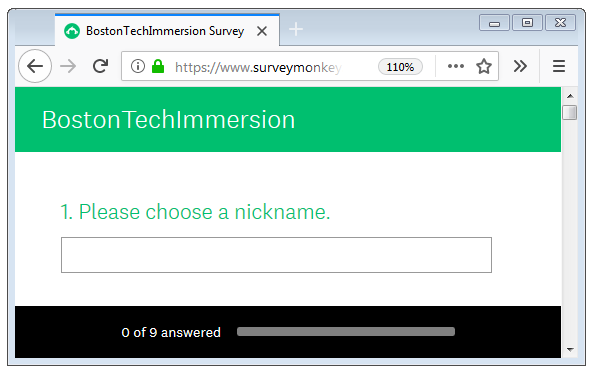

# We will:

- **Using data from the yesterdays survey, we are going to build a personal predictive model of what team you "should" be in!** (Don't take this too seriously though!)
- We are going to collect the survey data, use the answers of everybody else, **but your answers** to build a predictive model for team membership. Then, will use your data to predict which team you should have been in, according to the answers and team membership of everybody else (of course without your answer from the survey).
- You will be able to follow all steps using the same tools **some data scientists sometimes use**.
- **This will be as interactive as you want!** Interrupt me with question any time, **we have time for that**.

# Setting up your data science workplace

- Open a browser (Firefox, Edge work best) and navigate to: http://3.120.27.148:8000
- Log in using your username and password. I'll post the passwords in the zoom chat. 
- Pick **your** username from: '**abby_ah**, **alon_cir**, **andre_mapv**, **andreas_ct**, **astrid_ct**, **boris_cs**, **boukje_ah**, **carl_cir**, **christina_ah**, **daniel_ah**, **daniel_m_ch**, **daniel_mapv**, **daniel_w_ch**, **fabian_cs**, **florian_et**, **gitta_cs**, **hendrik_ah**, **jacob_ch**, **karsten_et**, **marjorie_et**, **markus_et**, **monica_cir**, **nergis_mapv**, **nicole_mapv**, **raphael_cs**, **ruediger_cs**, **sebastian_et**, **selina_cir**, **seth_ch**, **shivani_mapv**, **srikanth_ct**, **steve_ch**, **subrata_ct**, **swantje_cs**, **thibaut_mapv**, **tobias_cir**, **upinder_ct**'

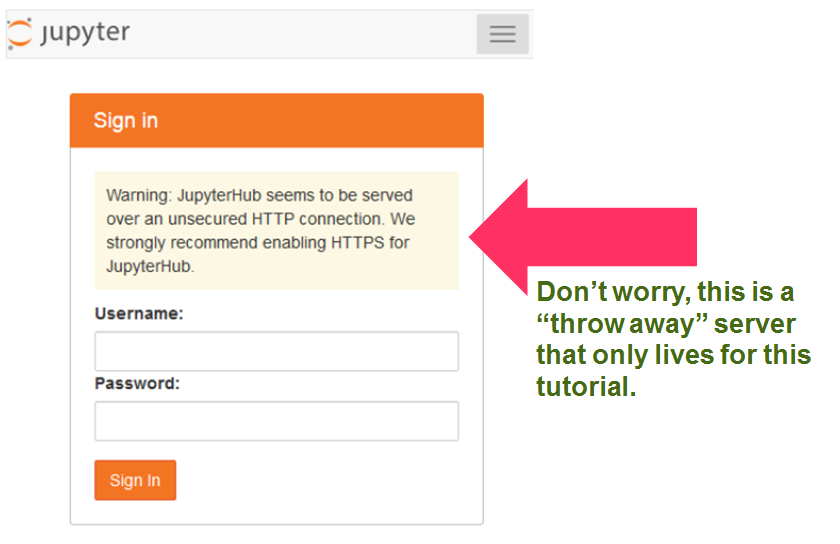

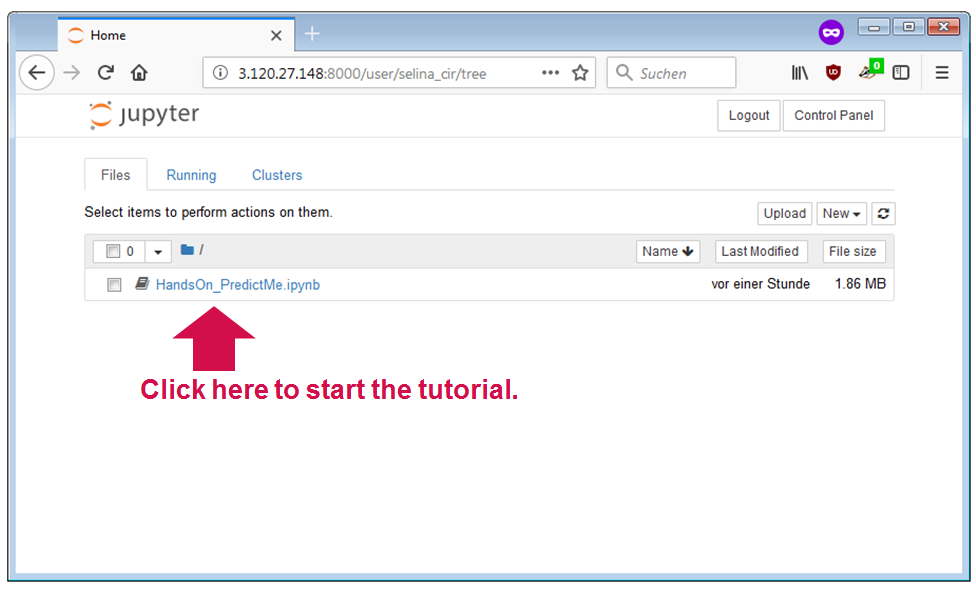

  - **I will show and explain what we do (Zoom window), you are invited to follow along in your browser window.**
  - Best screen setup is when both, the zoom window and the browser window, are fully visible without overlap. If you have two screens, distribute the zoom window and your browser to different screens. For a single screen, maximize both windows left (`Win + "<-"`) and right (`Win + "->"`) such that they are visible side by side.
  - Click on the file: `HandsOn_PredictMe.ipynb`. **Now, you and me should be literally on the same page.**

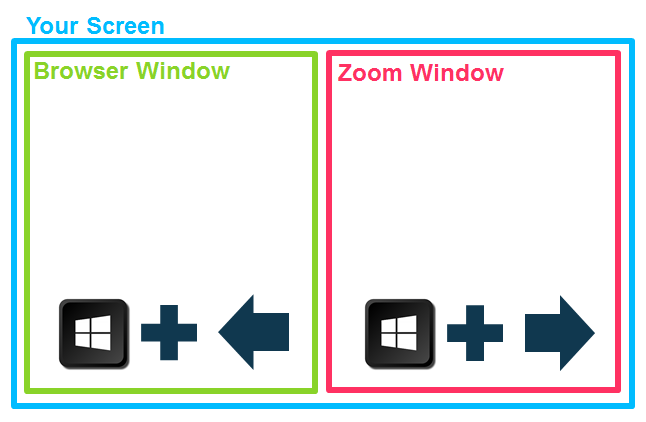

# Extremely short introduction to Python and Jupyter

- **This** is the Jupyter Notebook.
- Browser based access to *remote* computing resources. Look at url: `http://`, this is the server where actual computations take place. This server could potentially be much more powerful than your laptop (**!!**).
- Cell based interface (any Mathematica users here?). (Demo Time!)

In [ ]:
1+10

- Keyboard shortcuts under the **Help** menu. Most important one: **Evaluate** cells with `Shift+Enter`. You could also click the run button above.
- Powerful tool, gives access to computing resources, data loading, interactive data exploration, data visualization, and huge library of data science tool.

# Predict Me. We are going to:

- Reiterating, we are going to:
  - Take all answers from everybody else but you.
  - Train a machine learning model to predict team membership.
  - Use your survey answers to predict which team you *should* be in.
- We are going to:
  - Most importantly: **Try to answer all question you might have!**
  - Use the API of the survey service to collect the data.
  - Explore, visualize, and prepare the data.
  - Train a simple classifier to predict your team membership.
  - Look at how this classifier works.

# Import tools to fetch survey data

In [ ]:
import requests
import json
import pandas as pd

# Select survey

We need to tell the survey service which of our surveys we want to access:

In [ ]:
survey_id = "159220295"  # define survey id, how to get right click on survey in dashboard, then inspect
survey_id

# Authenticate us

- Authentication for APIs is usually not based on username and password.
- Access tokens are often used. These are long, non-guessable strings.
- Can be revoked by the service at any time.

In [ ]:
client = requests.session()
ACCESS_TOKEN = "cR0ExVVlERoMYtEcozWnVH5CzaZ55-Pib0ukZYPZfWEZazEGqUTPb0JJNIx0qZ-s-X1t92ky7Mzr4i5ukKSeJjXQQfb1w4oOPlgX0KKkRmqxcT7AtwBF7KtI.fTrp5hT"
headers = {  # basic authentication to the service
    "Authorization": "bearer %s" % ACCESS_TOKEN,
    "Content-Type": "application/json"
}

# Download survey data using their application programming interface (API)

In [ ]:
url = "%s%s" % (
    "https://api.surveymonkey.net", 
    "/v3/surveys/%s/details" % survey_id)
print(url)
response_json_details = client.get(url=url, headers=headers).json()

In [ ]:
response_json_details

Fetch survey results:

In [ ]:
url="%s%s" % ("https://api.surveymonkey.net", "/v3/surveys/%s/responses/bulk" % survey_id)
response_json = client.get(url=url,headers=headers).json()
print(url)

In [ ]:
response_json

# Parsing this structured data into a table

- How do we convert this structured (gibberish) text into meaningful data (what does that mean)? 
- Often, libraries exists who solve this problem. Here, we use a prof-of-concept just for this exercise, it will not handle everything that is possible with surveymonkey

In [ ]:
survey = []
for response in response_json["data"]:  # loop over all data fields
    resp = {}  # for each field, build dictionary
    for responses,ids in zip(response['pages'],response_json_details['pages']):
        for response in responses['questions']:
            qids = [ii for ii in ids['questions'] if ii['id'] == response["id"]][0]
            key = qids['headings'][0]['heading'].replace("<br>","")  # ger question string
            for answer in response['answers']:  # handle different categories differently
                if "text" in answer:
                    result = answer["text"]
                elif 'choice_id' in answer:
                    result = [ii for ii in qids['answers']['choices'] 
                              if ii['id'] == answer['choice_id']][0]['text']
                else:
                    raise
            resp[key] = result
    survey.append(resp)
survey = pd.DataFrame(survey)

Saving data into variable `survey`. 

In [ ]:
survey

Does this look familiar?

# Explore and visualize the data we have (start with numeric columns)

- Is it making sense?
- Did the data import work?
- Sensible thing to do before jumping into modeling!

- Start with numeric data in two dimensions.
- Select the columns, look at scatter plot.
- Start with rough and simple version.

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

data = [go.Scatter(
    text=survey["Please choose a nickname."],
    x=survey["How many years are you working for Bayer?"],
    y=survey["How much time do you spend commuting to work (one direction, in minutes)?"],
    mode = 'markers')]

In [ ]:
py.iplot(data)

This is not very informative. Which axis did we choose again? Where am "I" in this plot? [...]

In [ ]:
my_nickname = "André"
print(my_nickname)

In [ ]:
sel = survey["Please choose a nickname."] == my_nickname
fig = {"data":[
    go.Scatter(
        name="all",
        text=survey["Please choose a nickname."],
        x=survey["How many years are you working for Bayer?"],
        y=survey["How much time do you spend commuting to work (one direction, in minutes)?"],
        mode='markers',
    ),
    go.Scatter(
        name="you",
        x=survey[sel]["How many years are you working for Bayer?"],
        y=survey[sel]["How much time do you spend commuting to work (one direction, in minutes)?"],
        mode = 'markers',
        marker = {"size":20,"color":'rgba(152, 0, 0, .8)'}
    )],
         "layout":{
             "xaxis":{"title":"How many years are you working for Bayer?"},
             "yaxis":{"title":"How much time do you spend commuting <br> to work (one direction, in minutes)?"}
         }
         }

With more informative plot, it might be time to engage with stakeholders and domain experts. Possible questions are: Does this makes sense? Did you expect this? If not, why? ...

In [ ]:
py.iplot(fig)

# Now, that we have looked at two dimensions of our data, what about the others?
- How would you plot categories along with numerical data?
- How can we visualize more than two (three) variables? E.g.:
- You could slice many 2D planes trough your data.

This is our survey data:  

In [ ]:
survey

# Use one-hot encoding to transform categorical data into (binary) numeric data. 

- Other methods exist to do similar things.
- We have one column with categorical data.
- Need to convert to numbers.
- Numbers are ordered, of there is no order to our categories; we should not introduce it.
- Convert one column with three possible answers into three columns with yes / no answer each.

In [ ]:
survey_one_hot = pd.get_dummies(survey.drop(
    columns=["Which team are you in?",'Please choose a nickname.','Who is leading your session?']
),columns=[
    'Which drink do you prefer?',
    'Which kind of these deserts do you like best?',
    'Which of the following artists would you listen to?'    
])
survey_one_hot

# Classifying which team you should be in

Take data of the others (not you) as training data. Later, use your data to evaluate the model and see which team you should be in (according to that model). This makes little sense, but let's continue! (**Why actually?**)

In [ ]:
my_nickname = "André"

In [ ]:
sel = survey["Please choose a nickname."] != my_nickname

In [ ]:
survey[sel]  # The "others"

In [ ]:
my_data = survey_one_hot[sel == False]  # My data
my_data

# Choosing a suitable machine learning algorithm

- After data preparation and data cleaning, the "actual" data science part starts (however, this is often coined as only 20% of our time).
- Depending on the task (e.g. regression, classification, clustering), chose the right algorithm. If there is no suitable algorithm, improve old ones or develop new ones.
- Then, select right hyper parameters and train the model.

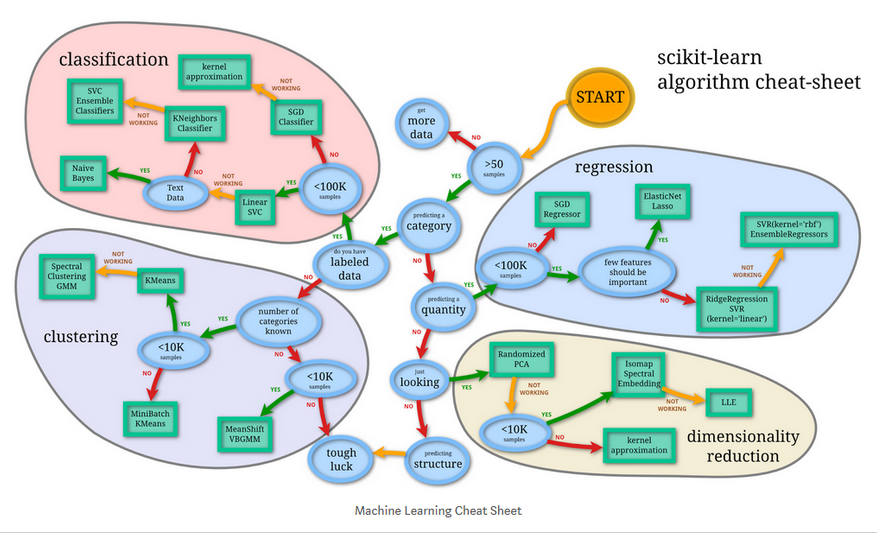

Let's train a decision tree classifier on our data. Also, set the right hyper parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2).fit(
    X=survey_one_hot[sel], # <- the data
    y=survey["Which team are you in?"][sel], # The "truth"
)
dt

# Lets have a look at our prediction!

In [ ]:
dt.predict(my_data)

**But why?**

In [ ]:
dt

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image 
import os    
os.environ["PATH"] += os.pathsep + '/data/andre/programme/anaconda/envs/insights2018/bin'
export_graphviz(
    dt, out_file='tree.dot',rounded = True, proportion = False, 
    precision = 2, filled = True,feature_names = survey_one_hot.columns,
    class_names = pd.unique(survey["Which team are you in?"][sel]))
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
Image(filename = 'tree.png')

# Thanks!

We would like to collect feedback from you. This way, we can improve this session based on data.
Please follow this link: https://www.surveymonkey.com/r/HGR3B25, let me know via andre.hollstein@bayer.com, or just comment now (if we have the time).

Admin link: https://www.surveymonkey.com/create/preview/?sm=Gz_2BwGWrpL2NpybkjZdVeQSv_2BcDoNPyXBSfPaREs0vpo_3D

# Bonus Material

Lets take our data and project it into the 2D plane in a way that distances in higer dimensions are keept as much as possible.   Geoff Hinton: "To deal with hyper-planes in a 14 dimensional space, visualize a 3D space and say 'fourteen' very loudly. Everyone does it."

In [ ]:
from sklearn.manifold import TSNE
arr = TSNE(n_components=2).fit_transform(survey_one_hot)

In [ ]:
# plotting
data = []
for team in survey["Which team are you in?"]:
    sel = survey["Which team are you in?"] == team

    data.append(go.Scatter(
        name=team,
        x=arr[sel,0],
        y=arr[sel,1],
        mode = 'markers',
        marker = {"size":30},    
    ))
    
fig = {
    "data":data,
    "layout":dict(
        xaxis=dict(autorange=True,showgrid=False,zeroline=False,showline=False,ticks='',showticklabels=False),
        yaxis=dict(autorange=True,showgrid=False,zeroline=False,showline=False,ticks='',showticklabels=False),
    )
}  

In [ ]:
py.iplot(fig)

# Some Python examples

- Programing language 
- Open source, avail for: Win, Linux, Mac
- Used by: Google (youtube), Facebook, Dropbox, NASA, IBM, Bayer, ..
- Pythin is dynamic, interpreded, object oriented, has a nice comunity, and is joy to use and learn
- At home: *maker scene* with the Rasberry Pi
- Quote: *Program or Be Programmed*
- **Major tool in data science, but not the only one! E.g. R or Matlab.**

In [ ]:
print("Hello World")

In [ ]:
import plotly.offline as py  # Load libraries we need
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)  # Define some needed settings

py.iplot([go.Scatter(  # Setting of the plot
    text=["A","B","C","D","E"], mode = 'lines',
    x=[10,20,30,45,40],
    y=[3,5,87,1,89])])

In [ ]:
# Pocket calculator
100**100 / 99**99

In [ ]:
# functions
def f(x):
    return x**2

# algorithms
for number in range(1,5):
    print(number,"->",f(number))

In [ ]:
# algorithms
def fib(n):
    a, b = 0, 1
    for _ in range(n):
        print(a,end=", ")
        a, b = b, a+b
fib(100)

# Resources for later:

- Jupyter Resources:
  - Tutorial for Beginners: https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  - Quick Start Guide: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- Python Resources:
  - PSF: https://www.python.org/
  - Community: http://www.pycon.org/